In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# jtplot.style(theme='monokai')

In [3]:
df = pd.read_pickle('../data/merged_df.pkl')

In [4]:
# set dates as index
df = df.set_index('dates')

In [5]:
df.describe()

,year,month,decade,happy_index,valence,energy,polarity,snp_high,snp_low,snp_mid,snp_vol,cci_value
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,6.850000e+02,685.000000
mean,1988.042336,6.491971,1983.722628,0.603603,0.616487,0.624510,0.574060,610.484848,571.192292,592.898481,2.085815e+10,99.982315
std,16.489221,3.458443,16.534887,0.033934,0.086318,0.089149,0.028092,617.217475,580.794410,601.314244,3.262736e+10,1.402862
min,1960.000000,1.000000,1960.000000,0.513319,0.348567,0.327558,0.491918,54.860001,51.349998,53.743334,5.386000e+07,96.215870
25%,1974.000000,3.000000,1970.000000,0.580875,0.562486,0.562450,0.554262,102.070000,95.519997,99.214500,3.613900e+08,98.921810
50%,1988.000000,6.000000,1980.000000,0.605319,0.617452,0.627392,0.575167,299.989990,275.670013,289.077499,3.260990e+09,100.429900
75%,2002.000000,9.000000,2000.000000,0.626099,0.676382,0.694167,0.594043,1150.569946,1076.699951,1120.566662,2.782980e+10,100.942800
max,2017.000000,12.000000,2010.000000,0.709603,0.874423,0.863053,0.647415,2300.989990,2245.129883,2273.060010,1.618436e+11,102.761600


In [6]:
def m_y_plot(df, field):
    plt.plot(df[field])
    plt.plot(df.resample('Q-NOV')[field].mean())
    plt.plot(df.resample('A-NOV')[field].mean())

#     plt.title(field + ' Over Time')
#     plt.xlabel('year-month')
    plt.ylabel(field)

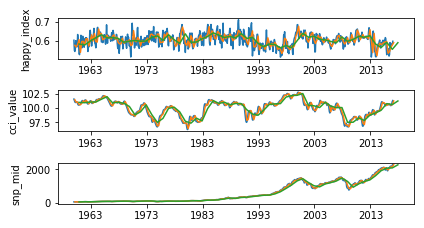

In [7]:
plt.subplot(411)
m_y_plot(df, 'happy_index')
plt.subplot(412)
m_y_plot(df, 'cci_value')
plt.subplot(413)
m_y_plot(df, 'snp_mid')
plt.tight_layout()

In [8]:
def m_y_plot(df, field):
    ax.plot(df[field])
    ax.plot(df.resample('Q-NOV')[field].mean())
    ax.plot(df.resample('A-NOV')[field].mean())

    ax.set_title(field + ' Over Time')
    ax.set_xlabel('year-month')
    ax.set_ylabel(field)

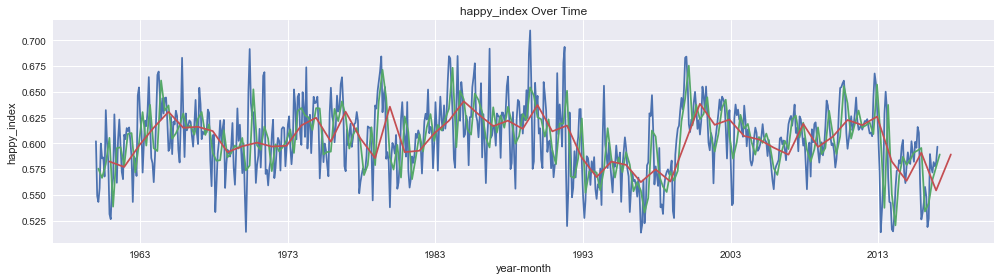

In [19]:
fig, ax = plt.subplots(1, figsize=(14, 4))
m_y_plot(df, 'happy_index')
# ax.set_ylim(0, 1)
plt.tight_layout()

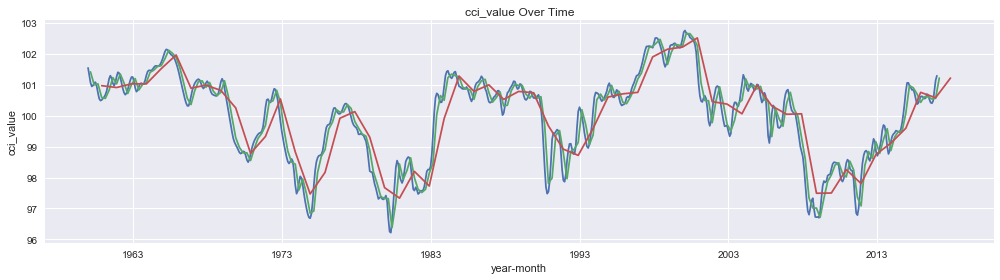

In [20]:
fig, ax = plt.subplots(1, figsize=(14, 4))
m_y_plot(df, 'cci_value')
plt.tight_layout()

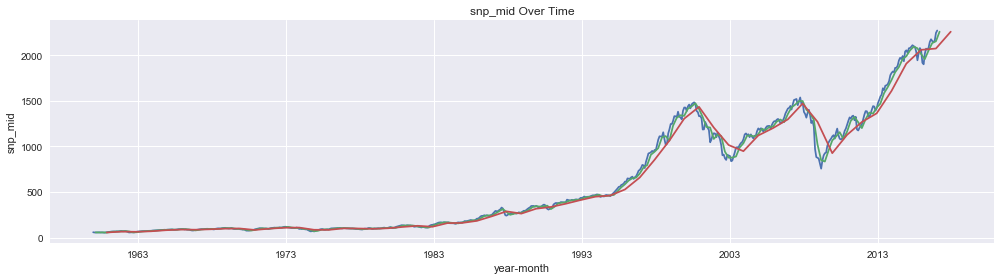

In [21]:
fig, ax = plt.subplots(1, figsize=(14, 4))
m_y_plot(df, 'snp_mid')
plt.tight_layout()

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int 'Results of Dickey-Fuller Test:')? (<ipython-input-12-3654f028321e>, line 17)